#                         **WINE QUALITY ANALYSIS**

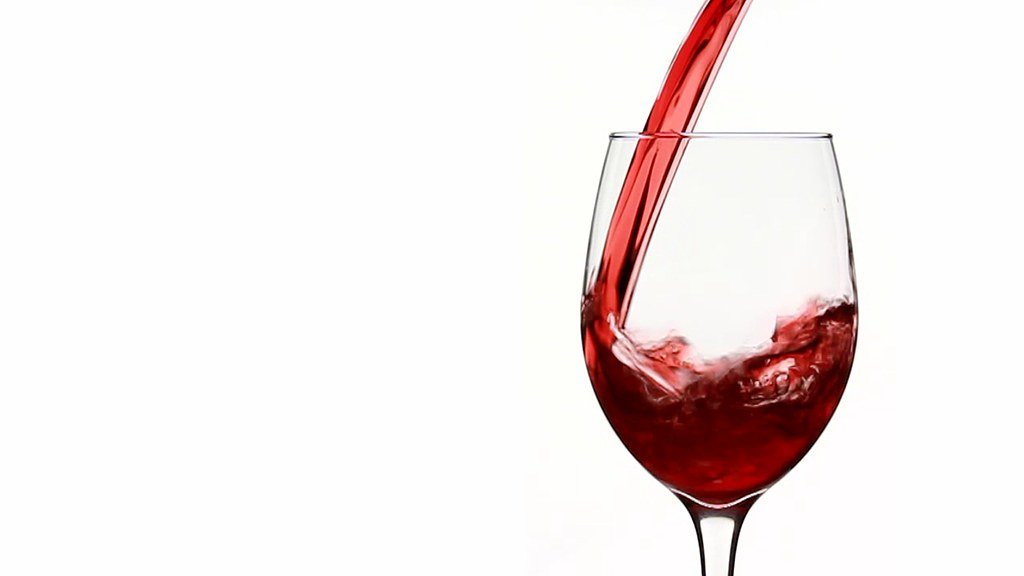[](http://)

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#data" role="tab" aria-controls="profile">Libraries<span class="badge badge-primary badge-pill">1</span></a>                                                                                             <a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="messages">Basic EDA<span
class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#viz" role="tab" aria-controls="profile">Visualizations<span
class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#fi" role="tab" aria-controls="profile">Feature Importance<span
class="badge badge-primary badge-pill">4</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#up" role="tab" aria-controls="profile">UPsampling<span
class="badge badge-primary badge-pill">5</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#down" role="tab" aria-controls="profile">Downsampling<span
class="badge badge-primary badge-pill">6</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#od" role="tab" aria-controls="profile">Outliers Detector<span
class="badge badge-primary badge-pill">7</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#le" role="tab" aria-controls="profile">Label Encoding<span
class="badge badge-primary badge-pill">8</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#mb" role="tab" aria-controls="profile">Model Building<span
class="badge badge-primary badge-pill">9</span></a>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#dgb" role="tab" aria-controls="profile">Decision Tree with GridSearchCV<span
class="badge badge-primary badge-pill">9.1</span></a>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#dgbs" role="tab" aria-controls="profile">Decision Tree with Staratified K_fold<span
class="badge badge-primary badge-pill">9.2</span></a>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#xgr" role="tab" aria-controls="profile">XGBOOST + RandomSearchCV<span
class="badge badge-primary badge-pill">9.3</span></a>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#xgg" role="tab" aria-controls="profile">XGBOOST + Stratified K_Fold + GridSearchCV<span
class="badge badge-primary badge-pill">9.4</span></a>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#pwbb" role="tab" aria-controls="profile">Predictions with best model<span
class="badge badge-primary badge-pill">10</span></a>  

# <a id='data'>1. Libraries</a>

In [ ]:
import seaborn as sns
import warnings

In [ ]:
sns.set(context="notebook", style="darkgrid", palette="deep", font="sans- serif", font_scale=1, color_codes=True)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score ,roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import f1_score 
from sklearn.utils import resample
from xgboost import XGBClassifier
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import tree
import xgboost as xgb
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
data.head()

# <a id='EDA'>2. Basic EDA</a>


In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
print(data.isnull().sum())

plt.figure(figsize=(15,6))
sns.heatmap(data.isnull(),cmap="viridis")

**This neat and clean Heatmap says that there is No null values present in the given Dataset.**

In [ ]:
data_1 = data.copy()

In [ ]:
print("Unique values are : {}".format(data_1["quality"].unique()))
data_1["quality"].value_counts()

  **Here I am converting quality measurments into 0,1 Format.**
* If value of quality is more than 6.5 Then quality of wine will be assuming as a Good quality wine.
* If value of quality is less than 6.5 Then quality of wine will be assuming as a Bad quality wine.

In [ ]:
for i,j in tqdm(enumerate(data_1["quality"])):
    if j > 6.5 :
        data_1["quality"].replace([j],["GOOD"],inplace=True)
    else:
        data_1["quality"].replace([j],["BAD"],inplace=True)
    
print(data_1["quality"].unique())  
print(data_1["quality"].value_counts())
data_1["quality"].head()

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(data=data_1,x=data_1["quality"])

**The ratio of target value is 86.4:13.6.
So, We can say that data is Highly Imbalanced. Which might leads to the problem of Overfitting.**

In [ ]:
data_1.columns

In [ ]:
sns.pairplot(data=data_1, hue="quality", palette="husl", markers=["o", "s"])

In [ ]:
data_1.corr()

In [ ]:
# Compute the correlation matrix
corr = data_1.corr()
plt.figure(figsize=(15, 18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

In [ ]:
data_1.describe()

# <a id='viz'>3. Visualizaions</a>

In [ ]:
a = data_1["quality"].value_counts()
plt.figure(figsize=(10,6))
plt.pie(a,labels=a.index,startangle=90,autopct='%1.1f%%',explode = (0, 0.1))
plt.show()

In [ ]:
def dist(a):
    plt.figure(figsize=(16,4))
    sns.distplot(data_1[a],kde=False,color="r")
    plt.title("Original")
    plt.show()
    plt.figure(figsize=(16,4))
    sns.distplot(data_1[a],kde=False,fit=norm,color="g")
    plt.title("Normalized")
    plt.show()
cc = data_1.columns
for i,x in  enumerate(cc[0:len(cc)-1]):
    y = i
    dist(cc[y])

In [ ]:
def Box(a):
    plt.figure(figsize=(16,4))
    sns.boxplot(x=data_1[a],hue=data_1["quality"])
    plt.title("with all qualities")
    plt.show()

    plt.figure(figsize=(16,4))
    sns.boxplot(x=a,y="quality",data=data_1,linewidth=2.5,palette="Set1")
    plt.title("With Quality Distribution")
    plt.show()

    plt.figure(figsize=(16,4))
    sns.boxplot(x=a,y="quality",data=data_1,linewidth=2.5,palette="Set2")
    sns.swarmplot(x=a,y="quality",data=data_1,color="0.1")
    plt.title("Boxplot with Swarmplot")
    plt.show()
cc = data_1.columns
for i,j in enumerate(cc[0:len(cc)-1]):
    Box(cc[i])

In [ ]:
def facet(a):

  facet = sns.FacetGrid(data_1,hue="quality",aspect=4)
  facet.map(sns.kdeplot,a,shade=True)
  facet.add_legend()
  plt.title(a)
    
cc = data_1.columns
for i,x in  enumerate(cc[0:len(cc)-1]):
    y = i
    facet(cc[y])

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(data=data_1,x="alcohol",y="sulphates",hue="quality",size="citric acid",palette="Set2")
plt.show()

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(data=data_1,y="alcohol",x="pH",hue="quality",size="volatile acidity",palette="Set2")
plt.legend(loc="best")
plt.show()

# <a id='fi'>4. Feature Importance</a>

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of a model. The data features that we use to train our machine learning models have a huge influence on the performance of a model.

Feature importance gives us a score for each feature of the data, the higher the score more important or relevant is the feature towards our output variable.

In [ ]:
X = data_1.drop(["quality"],axis=1)
Y = data_1["quality"]
bestfeatures2 = ExtraTreesClassifier()
fit2 = bestfeatures2.fit(X,Y)
feat_importances = pd.Series(fit2.feature_importances_, index=X.columns)
plt.figure(figsize = (16,5))
feat_importances.plot(kind='barh')
plt.title("Importance of features")
plt.show()


In [ ]:
col = data_1.columns
Dict = {}
for i in tqdm(col):
    a = data_1[i].unique()
    b = len(a)
    Dict[i] = b
print(Dict)    
print(min(Dict.values()))    

# <a id='up'>5. UPsampling</a>

In [ ]:
## UPsampling
data_1_minority = data_1[data_1.quality == "GOOD"] 
data_1_majority = data_1[data_1.quality == "BAD"] 


Upsample = resample(data_1_minority,replace=True,n_samples=1382,random_state=123)
Upsample.quality.value_counts()
resultant_data_UP = pd.concat([data_1_majority,Upsample],axis=0)

sns.countplot(x="quality",data=resultant_data_UP)
plt.show()

# <a id='down'>6. DOWNsampling</a>

In [ ]:
## DOWNsampling
data_1_minority = data_1[data_1.quality == "GOOD"] 
data_1_majority = data_1[data_1.quality == "BAD"] 


downsample = resample(data_1_majority,replace=True,n_samples=217,random_state=123)
downsample.quality.value_counts()
resultant_data_DOWN = pd.concat([data_1_minority,downsample],axis=0)

sns.countplot(x="quality",data=resultant_data_DOWN)
plt.show()

# <a id='od'>7. Outliers Detector</a>

**Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.**

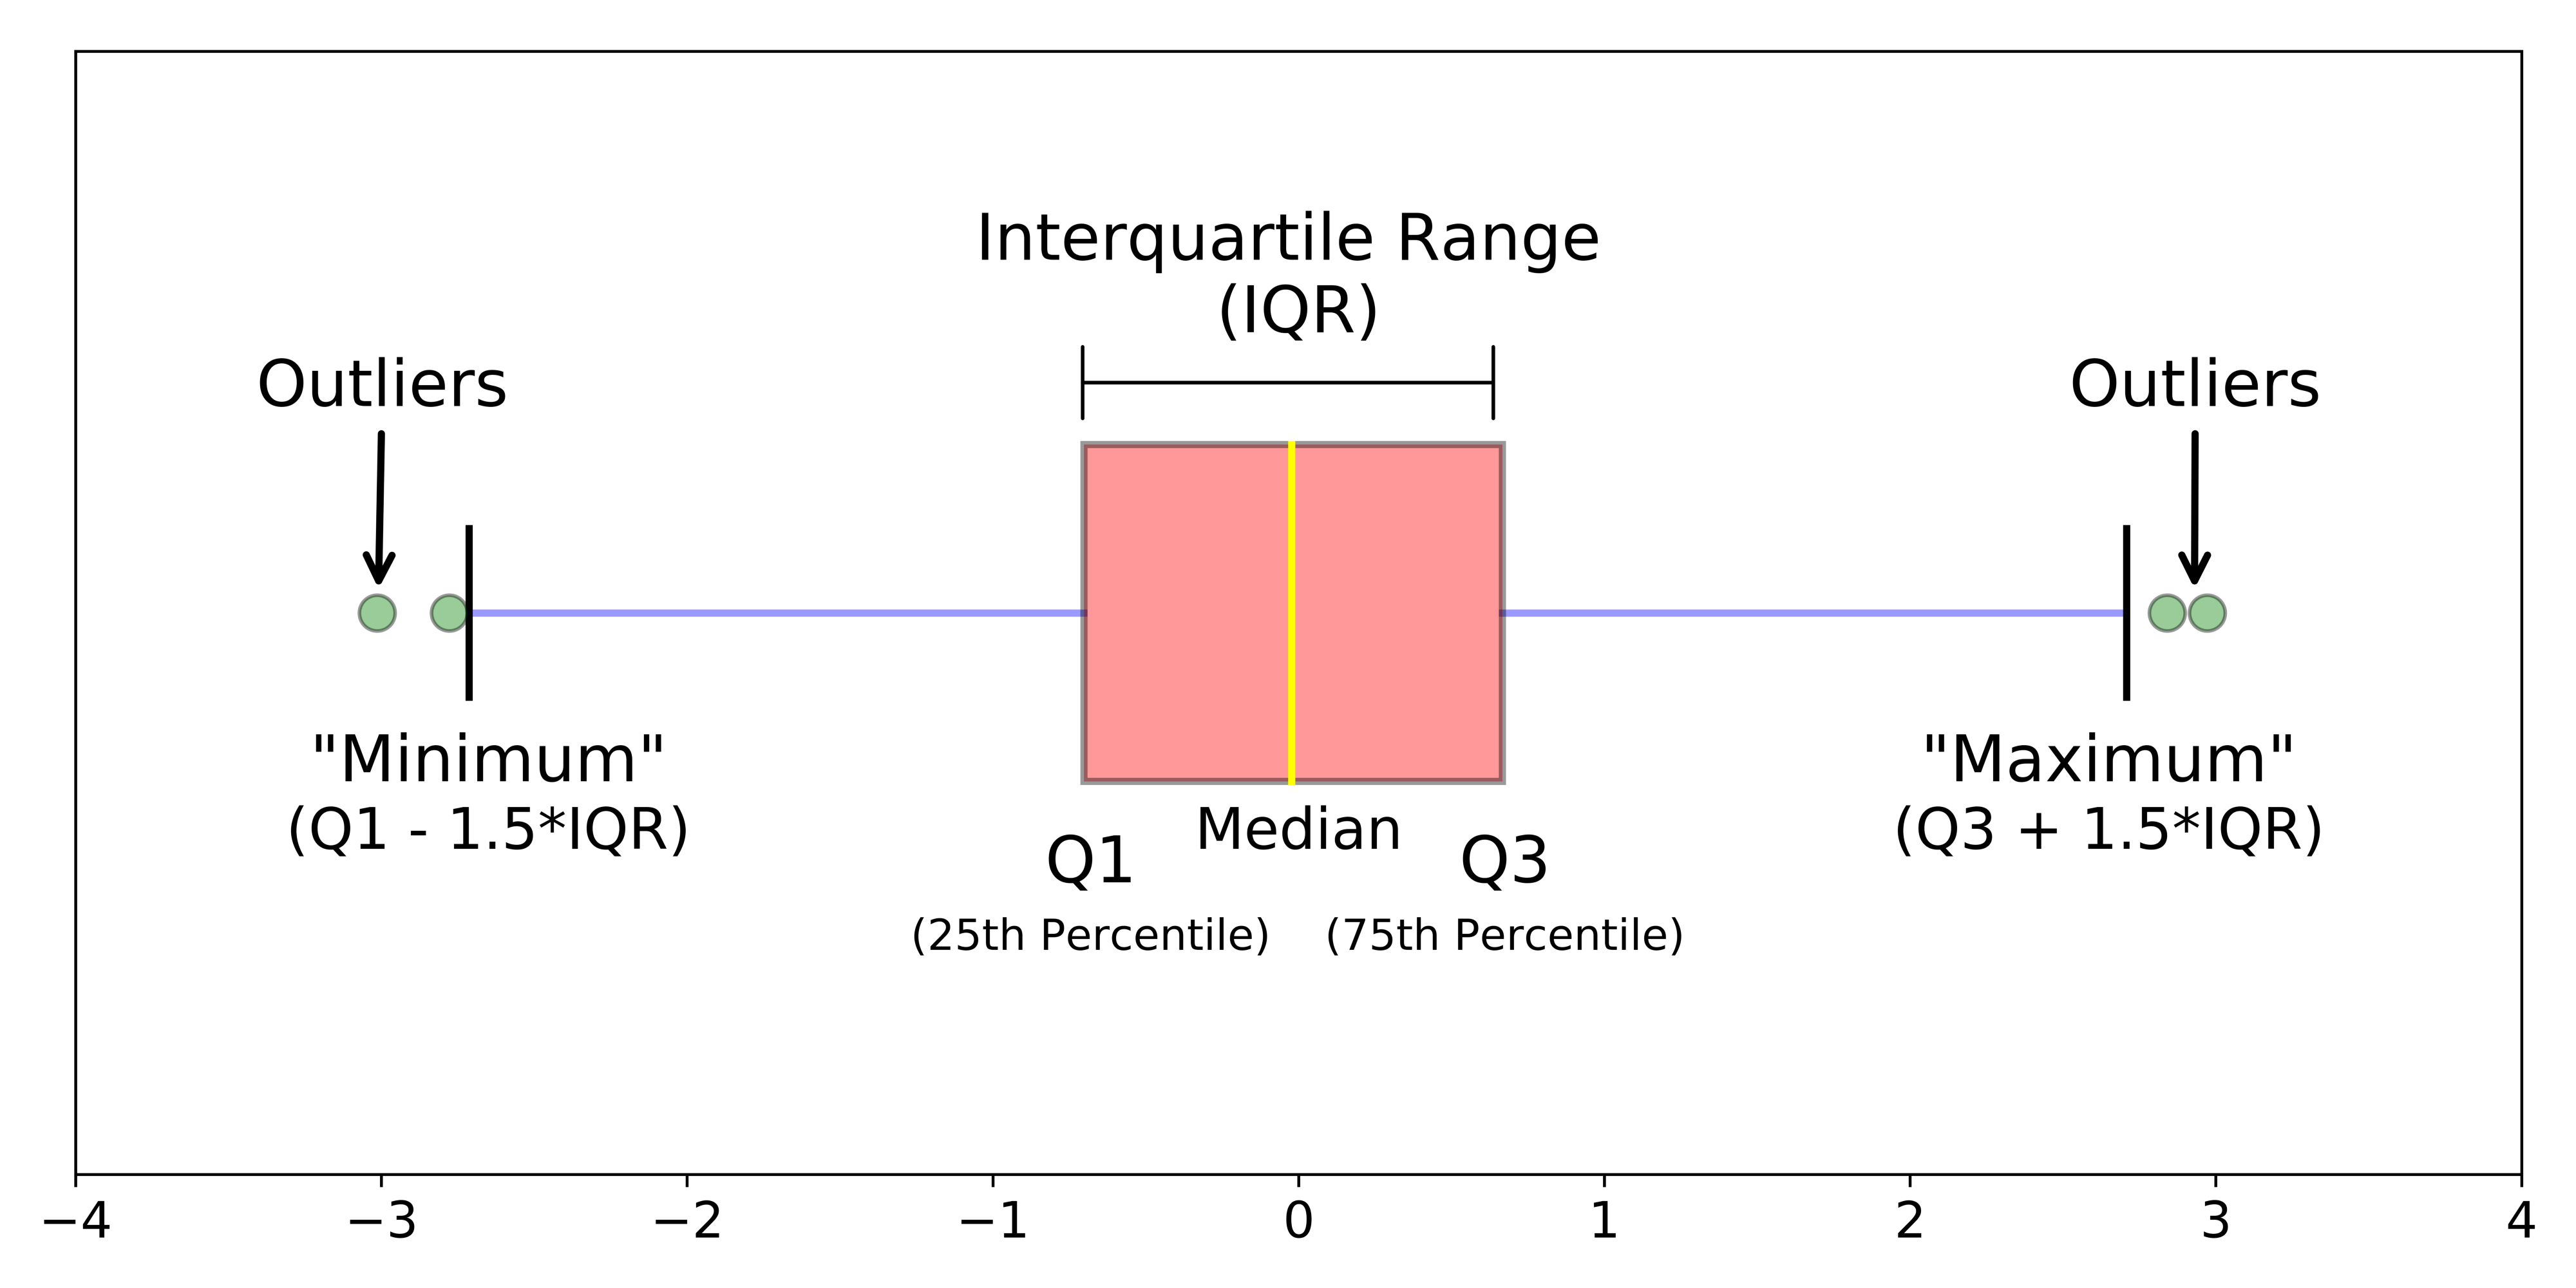

In [ ]:
def outlier(df,columns):
    for i in tqdm(columns[0:len(columns)-1]):
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
num_col = data_1.columns       
outlier(data_1,num_col)

# <a id='le'>8. Label Encoding</a>

In [ ]:
data_1 = data_1.apply(LabelEncoder().fit_transform)
data_1.head()

# <a id='mb'>9. Model Building</a>

In [ ]:
X = data_1.drop(["quality"],axis=1)
Y = data_1["quality"]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
print("shapes of data :\n{}\n{}\n{}\n{}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

In [ ]:
print("y_test :\n{}\ny_train :\n{}".format(y_test.value_counts(),y_train.value_counts()))

#  <a id='dgb'>9.1. Decision Tree with GridSearchCV</a>

In [ ]:
parameters = {'max_depth':range(3,20),"criterion":['gini', 'entropy']}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

aa = tree_model.predict(X_test)
print(accuracy_score(aa,y_test))
print(classification_report(aa,y_test))
print(confusion_matrix(aa,y_test))
print("roc auc score : ",roc_auc_score(aa,y_test))

# <a id='dgbs'>9.2.Decision Tree with Stratified K_fold </a>

In [ ]:
X_train_new = np.array(X_train)
y_train_new = np.array(y_train)

data_y, data_yhat = list(), list()
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=True)

# enumerate splits
for train_ix, test_ix in tqdm(kfold.split(X_train_new,y_train_new)):
    # get data
    train_X, test_X = X_train_new[train_ix], X_train_new[test_ix]
    train_y, test_y = y_train_new[train_ix], y_train_new[test_ix]
    # fit model
    model = DecisionTreeClassifier(criterion= 'gini', max_depth=4)
    model.fit(train_X, train_y)
    # make predictions
    yhat = model.predict(test_X)
    # store
    data_y.extend(test_y)
    data_yhat.extend(yhat)
    # evaluate the model
    acc = accuracy_score(data_y, data_yhat)
    print('Accuracy of validation set(Unseen data): %.3f' % (acc))
    import pickle
    Pkl_filename = "DTK_model.pkl"
    with open(Pkl_filename, 'wb') as file:
      pickle.dump(model, file)


# Load from file
with open(Pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
pre =  pickle_model.predict(X_test)    

print("Report of X_test:\nAccuracy : {}\nroc_auc_score : {}\nConfusion_matrix :\n{}\nClassification_report :\n {}".format(accuracy_score(pre,y_test),roc_auc_score(pre,y_test),confusion_matrix(pre,y_test),classification_report(pre,y_test)))
    
    

# <a id='xgr'>9.3.XGBOOST with RandomSearchCV</a>

In [ ]:
params = {"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"max_depth":[1,2,3,4,5,6,8,9,10],"min_child_weight":[1,2,3,4,5,6,7,8,9],"gamma":[0.0,0.1,0.2,0.3,0.4,0.5],"colsample_bytree":[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"n_estimators":[100,200,300,400,500]}
classifier = XGBClassifier()
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=10,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)
random_search.best_estimator_

XGB = random_search.best_estimator_
XGB_fit = XGB.fit(X_train,y_train)
XGB_pred = XGB_fit.predict(X_test)
XGB_pred_train = XGB_fit.predict(X_train)
print("Training set accuracy : {}\nConfusion matrix :\n {}\nFull Report :\n{}\nroc_auc_score : {}".format(accuracy_score(XGB_pred_train,y_train),confusion_matrix(XGB_pred_train,y_train),classification_report(XGB_pred_train,y_train),roc_auc_score(XGB_pred_train,y_train)))
print("Testing set accuracy : {}\nConfusion matrix :\n {}\nFull Report :\n{}\nroc_auc_score : {}".format(accuracy_score(XGB_pred,y_test),confusion_matrix(XGB_pred,y_test),classification_report(XGB_pred,y_test),roc_auc_score(XGB_pred,y_test)))


# <a id='xgg'>9.4.XGBOOST+Stratified K_fold+GridSearchCV </a>

In [ ]:
parameters = {"learning_rate":[0.01,0.1,0.05],"max_depth":[2,3,4,5],"min_child_weight":[1,2,3,4],"gamma":[0.0,0.1,0.05],"colsample_bytree":[0.3,0.4,0.5],"n_estimators":[100,200,300]}
xgb_model = XGBClassifier()
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=True)

clf_g = GridSearchCV(xgb_model, parameters, n_jobs=5, cv=kfold,  scoring='roc_auc',verbose=2, refit=True)
clf_g.fit(X_train, y_train)


XGB_predg = clf_g.predict(X_test)
XGB_pred_traing = clf_g.predict(X_train)
print("Training set accuracy : {}\nConfusion matrix :\n {}\nFull Report :\n{}\nroc_auc_score : {}".format(accuracy_score(XGB_pred_traing,y_train),confusion_matrix(XGB_pred_traing,y_train),classification_report(XGB_pred_traing,y_train),roc_auc_score(XGB_pred_traing,y_train)))
print("Testing set accuracy : {}\nConfusion matrix :\n {}\nFull Report :\n{}\nroc_auc_score : {}".format(accuracy_score(XGB_predg,y_test),confusion_matrix(XGB_predg,y_test),classification_report(XGB_predg,y_test),roc_auc_score(XGB_predg,y_test)))
    
    

In [ ]:
Best_roc_Score  = [roc_auc_score(XGB_predg,y_test),roc_auc_score(XGB_pred,y_test),roc_auc_score(pre,y_test),roc_auc_score(aa,y_test)]
Best_acuuracy_Score = [accuracy_score(XGB_predg,y_test),accuracy_score(XGB_pred,y_test),accuracy_score(pre,y_test),accuracy_score(aa,y_test)]
model_name = ["XGBOOST+Gs+Skfold","XGBOOST+RSCV","DecisionTre+Skfold","DecisionTree+Gridsearch"]
print(Best_roc_Score)
print(Best_acuuracy_Score)                                                                                                                                   

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x=model_name,y=Best_roc_Score,color="r")
plt.xticks(rotation=90)
plt.xlabel("Algorithm name")
plt.ylabel("Roc auc score")
plt.show()

plt.figure(figsize=(15,6))
sns.pointplot(x=model_name,y=Best_acuuracy_Score,color="g")
plt.xticks(rotation=90)
plt.xlabel("Algorithm name")
plt.ylabel("Accuracy score")
plt.show()

# <a id='pwbb'>10. Predictions with best model </a>

In [ ]:
Best_roc_Score  = [roc_auc_score(XGB_predg,y_test),roc_auc_score(XGB_pred,y_test),roc_auc_score(pre,y_test),roc_auc_score(aa,y_test)]
Model_name = [clf_g,XGB_fit,pickle_model,tree_model]
p = max(Best_roc_Score)
for i,j in enumerate(Best_roc_Score):
   if j == p :
      print("The Best model is :\n {} ".format(Model_name[i]))
      print("Predictions with Best Model :")
      Best_predictions = Model_name[i].predict(X_test)
      print(Best_predictions)
    
      print("roc_auc_score is :",roc_auc_score(Best_predictions,y_test))
      print("accuracy_score is : ",accuracy_score(Best_predictions,y_test))
      print("Confusion_matrix is :\n {}".format(confusion_matrix(Best_predictions,y_test)))
      print("classification_report is :\n {}".format(classification_report(Best_predictions,y_test)))
      
      ########### ROC curve   ######
      fpr, tpr, thresholds = roc_curve(y_test,Best_predictions)
      roc_auc = roc_auc_score(y_test,Best_predictions)
      plt.figure(figsize  = (15,6))
      plt.plot(fpr, tpr, label = 'Sensitivity = %0.3f' % roc_auc)
      plt.plot([0, 1], [0, 1],'r--')
      plt.xlabel('FALSE POSITIVE RATE')
      plt.ylabel('TRUE POSITIVE RATE')
      plt.title('ROC curve for test data')
      plt.legend(loc="lower Right")
      plt.show()
      
      ########### ROC  AUC curve   ######
      # generate a no skill prediction (majority class)
      ns_probs = [0 for _ in range(len(y_test))]

      # predict probabilities
      lr_probs = Model_name[i].predict_proba(X_test)

      # keep probabilities for the positive outcome only
      lr_probs = lr_probs[:, 1]
      # calculate scores
      ns_auc = roc_auc_score(y_test, ns_probs)
      lr_auc = roc_auc_score(y_test, lr_probs)

      # summarize scores
      print('No Skill: ROC AUC=%.3f' % (ns_auc))
      print('XGBOOST: ROC AUC=%.3f' % (lr_auc))

      # calculate roc curves
      ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
      lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
      plt.figure(figsize = (15,6))
      plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
      plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.legend()
      plt.title("ROC_AUC curve for test data")
      plt.show()    
      
      # Precision Recall curve
      lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
      lr_f1, lr_auc = f1_score(y_test, Best_predictions), auc(lr_recall, lr_precision)
      no_skill = len(y_test[y_test==1]) / len(y_test)
      # summarize scores
      print('XGBOOST: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
      plt.figure(figsize=(15,6))
      plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
      plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
      plt.xlabel('Recall')
      plt.ylabel('Precision')
      plt.legend()
      plt.show()
      

# **What is ROC and AUC Curve ?**

* Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
* Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

If you are confused, remember, when we predict a binary outcome, it is either a correct prediction (true positive) or not (false positive). There is a tension between these options, the same with true negative and false negative.

A skilful model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average. This is what we mean when we say that the model has skill. Generally, skilful models are represented by curves that bow up to the top left of the plot.

A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill is represented at the point (0.5, 0.5). A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

A model with perfect skill is represented at a point (0,1). A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.

An operator may plot the ROC curve for the final model and choose a threshold that gives a desirable balance between the false positives and false negatives.

In [ ]:
Comparison_data = pd.DataFrame(y_test)
Comparison_data['Predicted quality'] = Best_predictions
print(Comparison_data.head())
Comparison_data.to_csv("Output_Comparison.csv",index=False)

# **Please Do give an Upvote If you liked the notebook.**

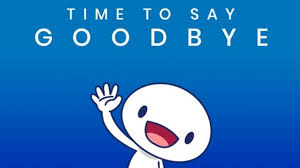